# Showcase

O propósito desse notebook é apresentar um overview geral do resultado do modelo e também uma visualização do impacto da variação de número de superpixels na qualidade de segmentação.

In [2]:
import os
os.environ["LOGURU_LEVEL"] = "ERROR"

In [3]:
from egsis.datasets import grabcut
import matplotlib.pyplot as plt
from egsis import model
from egsis import metrics
from egsis import image

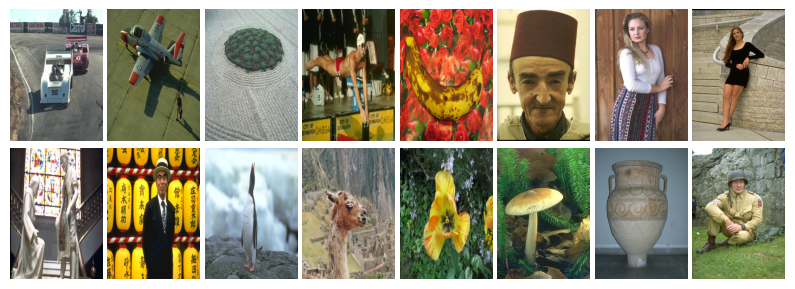

In [25]:
column_a = [
    "21077.jpg",
    "37073.jpg",
    "86016.jpg",
    "153093.jpg",
    "banana3.bmp",
    "189080.jpg",
    "181079.jpg",
    "388016.jpg"
]
column_b = [
    "24077.jpg",
    "65019.jpg",
    "106024.jpg",
    "llama.bmp",
    "flower.jpg",
    "208001.jpg",
    "227092.jpg",
    "376043.jpg"
]

fig, ax = plt.subplots(2, 8, figsize=(10, 3.5))

for i in range(len(column_a)):
    x, y = column_a[i], column_b[i]
    img_a = grabcut.get_labeled_image_by_name(x)
    img_b = grabcut.get_labeled_image_by_name(y)
    ax[0, i].imshow(img_a.data)
    ax[1, i].imshow(img_b.data)

for a in ax.ravel():
    a.set_axis_off()
    a.set_aspect("auto")

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

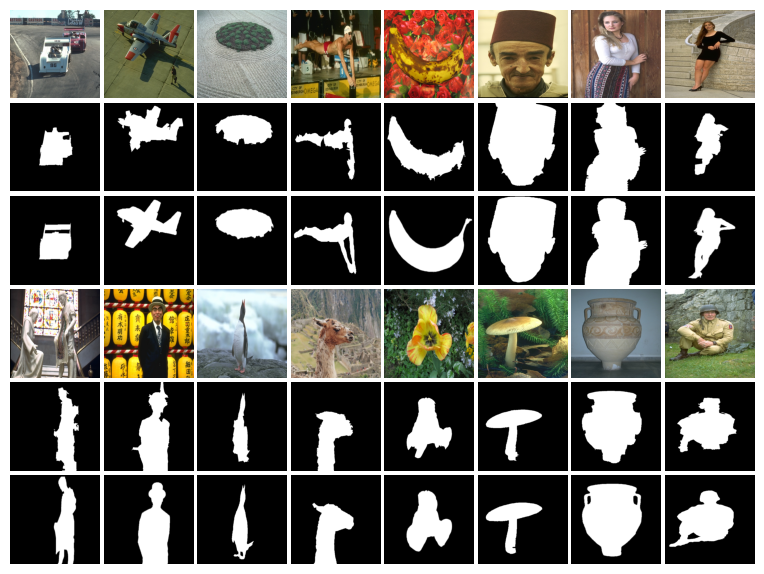

In [15]:
m = model.EGSIS(
    superpixel_segments=200,
    superpixel_sigma=0.8,
    superpixel_compactness=40,
    feature_extraction="comatrix",
    lcu_max_iter=100,
    feature_similarity="euclidian_exp",
)

column_a = [
    "21077.jpg",
    "37073.jpg",
    "86016.jpg",
    "153093.jpg",
    "banana3.bmp",
    "189080.jpg",
    "181079.jpg",
    "388016.jpg"
]
column_b = [
    "24077.jpg",
    "65019.jpg",
    "106024.jpg",
    "llama.bmp",
    "flower.jpg",
    "208001.jpg",
    "227092.jpg",
    "376043.jpg"
]

fig, ax = plt.subplots(6, 8)
zoom = 1.5
w, h = fig.get_size_inches()
fig.set_size_inches(w * zoom, h * zoom)

for i in range(len(column_a)):
    x, y = column_a[i], column_b[i]
    img_a = grabcut.get_labeled_image_by_name(x)
    img_b = grabcut.get_labeled_image_by_name(y)
    # Fit predict receiving a image mask
    # re-encoding y-values to be in {0,1} because for EGSIS, y=0 means non-labeled
    mask_a = m.fit_predict_segmentation_mask(img_a.data, img_a.y_train()) - 1
    mask_b = m.fit_predict_segmentation_mask(img_b.data, img_b.y_train()) - 1
    ax[0, i].imshow(img_a.data)
    ax[1, i].imshow(mask_a, cmap="gray")
    ax[2, i].imshow(img_a.segmentation, cmap="gray")
    ax[3, i].imshow(img_b.data)
    ax[4, i].imshow(mask_b, cmap="gray")
    ax[5, i].imshow(img_b.segmentation, cmap="gray")


for a in ax.ravel():
    a.set_axis_off()
    a.set_aspect("auto", anchor="W")

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()